<a href="https://colab.research.google.com/github/posttsoi/-building-the-first-neural-networks/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import torch

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib

In [150]:
from functools import reduce

Train dataset



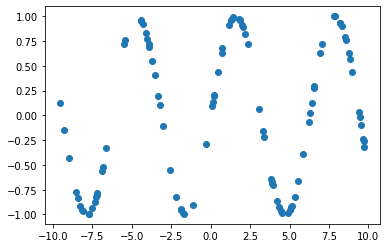

In [226]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

def func(x):
  return torch.sin(x)

y_train = func(x_train)

plt.plot(x_train.numpy(), y_train.numpy(),'o')



In [227]:
noise = torch.rand(y_train.shape) * 0.09  # сгенерируем шум



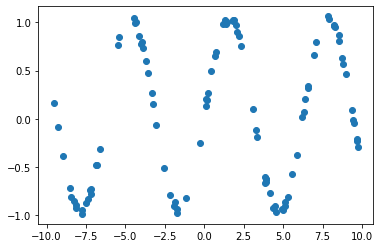

In [228]:
y_train += noise

plt.plot(x_train.numpy(), y_train.numpy(),'o')

In [229]:
x_train.unsqueeze_(1)  # получаем вектора "строки" вектор  "столбец"
y_train.unsqueeze_(1)

tensor([[-0.8302],
        [ 0.3391],
        [ 0.2626],
        [-0.9758],
        [-0.6228],
        [-0.9395],
        [ 0.8597],
        [ 0.0749],
        [ 1.0624],
        [-0.2262],
        [ 0.9790],
        [-0.5756],
        [ 0.5652],
        [ 0.7924],
        [-0.9618],
        [-0.8200],
        [ 0.9638],
        [-0.4747],
        [-0.3855],
        [ 0.6651],
        [ 0.8070],
        [ 0.6889],
        [-0.8667],
        [-0.0131],
        [-0.7844],
        [ 0.3239],
        [ 0.0999],
        [-0.9854],
        [-0.9326],
        [-0.7259],
        [ 0.7918],
        [-0.8953],
        [ 0.9678],
        [-0.4750],
        [-0.6194],
        [ 0.4675],
        [ 0.7291],
        [ 0.7673],
        [-0.0604],
        [-0.8998],
        [ 1.0347],
        [-0.6601],
        [ 0.2033],
        [-0.8106],
        [-0.3098],
        [-0.2088],
        [ 1.0128],
        [-0.0407],
        [ 0.6293],
        [-0.8068],
        [-0.0805],
        [-0.6598],
        [ 1.

In [230]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = func(x_validation)

x_validation.unsqueeze_(1)  # получаем вектора "строки" вектор  "столбец"
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

In [250]:
class SineNet(torch.nn.Module):
    """Модель линейной нейронной сети."""
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()  # вызываем родительский инициализатор 
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons, bias= True)  # первый  полносвязный слой с одним входом (координата x)
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons, bias= True)  # выходной нейнон 
        self.tanh1 = torch.nn.Sigmoid()  #  функция активации
        self.tanh2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1, bias= True)
        self.nlayers = [self.fc1, self.tanh1, self.fc2, self.tanh2, self.fc3]

    def forward(self, x):
        """Фунция описывает в какой последовательности будут применяться наши слои."""
        return reduce(lambda x,f : f(x), self.nlayers , x)

In [266]:
sine_net = SineNet(100)

**Optimizer**



In [272]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.001)

**Loss function**


In [253]:
 loss = torch.nn.L1Loss()

**Training procedure**


In [273]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()
    optimizer.step()



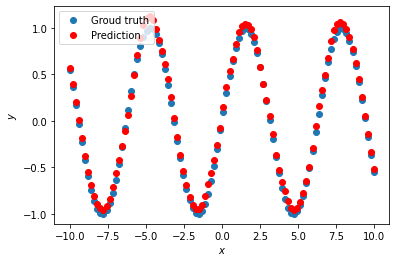

In [274]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


predict(sine_net, x_validation, y_validation)